## Regions

_Regions_ in `ds9` serve multiple purposes.  Some are purely decorative such as the `Text` and `Compass`.  Some are functional such as `Projection`, and some represent multiple analysis regions such as `Annulus` and `Panda`

> `Panda` = `Pie` `AND` `Annulus`

In this section we demonstrate a few of these

- Decorations
- Plot3D
- Statistics
- Projection

---

### Decorations

> Remember, to create and manipulate regions, be sure you are in `Edit -> Region` mode.


### Data

This data has been heavily processed to remove the point sources embedded in the extended emission.  The basic steps replicate the [An image of Diffuse Emission](http://cxc.harvard.edu/ciao/threads/diffuse_emission/index.html) thread.

The processing starts with cluster 
[Abell401, OBS_ID 14024](http://cda.harvard.edu/srservices/ocatDetails.do?obsid=14024)


```bash
download_chandra_obsid 14024
chandra_repro 14024 out=repro
fluximage "14024/repro/acisf14024_repro_evt2.fits[ccd_id=0:3]" out=a401 bin=1 \
    band="0.500:3.000:1.4" psfecf=0.9
wavdetect infile='a401_0.500-3.000_thresh.img' outfile='wav.out' \
  scellfile='wav.cell' imagefile='wav.recon' defnbkgfile='wav.nbkg' \
  expfile='a401_0.500-3.000_thresh.expmap' \
  psffile='a401_0.500-3.000_thresh.psfmap' \
  scales='1.4 2 4 8 12 16'
roi infile=wav.out outsrcfile="srcfill/srcs_%04d.fits" group=indi \
  radiusmode=mul bkgradius=3 bkgfactor=2 bkgfunction=add targetbkg=target
splitroi @srcfill/srcs.lis points
dmfilth a401_0.500-3.000_thresh.img a401.img method="POISSON" \
    srclist="@points.src.reg" bkglist="@points.bg.reg" 
aconvolve a401.img a401_sm.img lib:'gaus(2,5,1,2,2)' meth=slide clob+
aconvolve a401_0.500-3.000_thresh.expmap a401_sm.exp lib:'gaus(2,5,1,2,2)' \
    meth=slide clob+
dmimgcalc a401_sm.img a401_sm.exp a401_sm.flux div clob+ 
dmimgthresh a401_sm.flux a401_sm_thresh.flux cut=5% \
  exp=a401_0.500-3.000_thresh.expmap value=0 clob+
```


In [1]:
cd RegionDecoration;  
ds9 a401_sm_thresh.flux -block 4 -scale linear -pan to 4205.73 4357.09 physical &  

[1] 27085


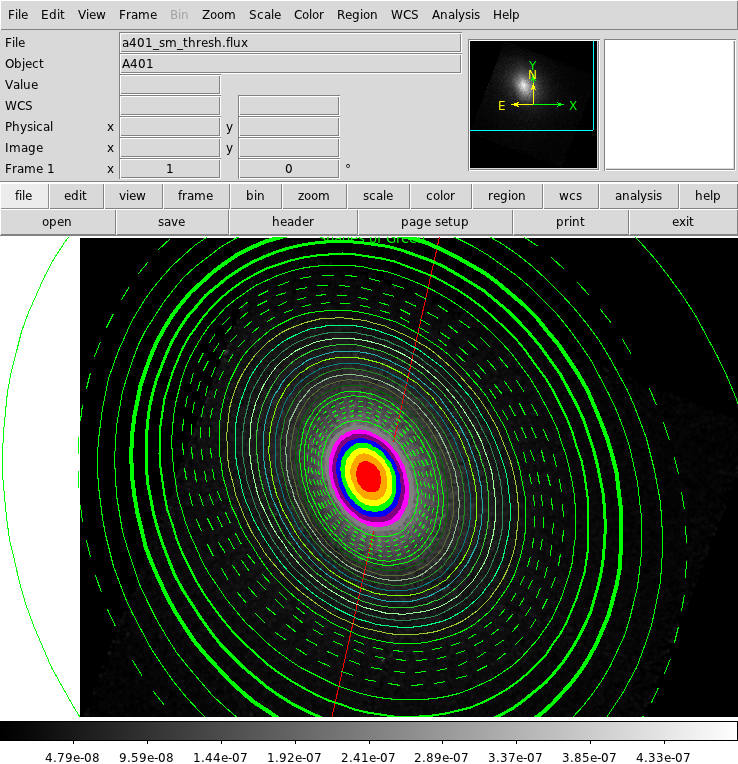

In [2]:
xpaset -p ds9 region load ds9.reg  

import -window "SAOImage ds9" ds9_04_regions_02.png 
display < ds9_04_regions_02.png

In [3]:
grep 'fill=1' ds9.reg

Ellipse(4205.73,4357.09,65.3328,47.5412,-69.2655) #  color=red fill=1
Ellipse(4206.72,4356.37,96.5828,69.6816,-67.0843) #  color=orange fill=1
Ellipse(4205.87,4355.63,121.583,88.7383,-65.0033) #  color=yellow fill=1
Ellipse(4205.41,4354.61,143.458,104.839,-65.6778) #  color=green fill=1
Ellipse(4205.12,4353.4,165.333,120.587,-65.4777) #   color=blue fill=1
Ellipse(4205.52,4351.85,185.645,134.127,-64.8471) #  color=purple fill=1
Ellipse(4206.81,4351.17,204.395,148.252,-63.8608) #  color=magenta fill=1
Ellipse(4208.95,4350.84,224.708,163.856,-62.6683) #  color=grey fill=1


In [4]:
grep 'darkgreen' --after-context=12 ds9.reg

Ellipse(4217.19,4352.56,388.77,280.943,-64.0236) #  color=darkgreen
Ellipse(4218.47,4353.69,412.208,298.867,-63.1396) #  color=darkolivegreen
Ellipse(4219.49,4355.47,434.083,317.69,-62.0701) #  color=darkseagreen
Ellipse(4220.27,4356.91,457.52,336.716,-61.5087) #  color=forestgreen
Ellipse(4221.08,4357.75,480.958,358.111,-60.6625) #  color=teal
Ellipse(4220.87,4359.08,505.958,380.527,-60.067) #  color=lawngreen
Ellipse(4220.9,4359.77,530.958,401.577,-59.6175) #  color=lightseagreen
Ellipse(4220.63,4360.33,559.083,425.075,-58.769) #  color=limegreen
Ellipse(4220.77,4360.28,587.208,448.562,-57.8081) # color=palegreen
Ellipse(4220.76,4359.89,615.333,474.052,-56.6615) # color=seagreen
Ellipse(4220.36,4359.74,646.583,500.295,-55.8772) # color=springgreen
Ellipse(4219.88,4359.3,680.958,526.823,-54.83) #  color=yellowgreen
Ellipse(4219.52,4357.85,715.333,556.473,-54.9205) #  text="Shades of Green"


In [5]:
grep 'width=.$' ds9.reg

Ellipse(4227.63,4322.95,971.583,806.68,-57.2076) #  width=2
Ellipse(4232.08,4308.8,1034.08,868.965,-58.151) #   width=3
Ellipse(4236.62,4293.31,1102.83,935.269,-59.6756) #  width=4


In [6]:
grep 'tag=' ds9.reg

Ellipse(4214.29,4351.05,345.802,247.916,-64.718) #  tag="Somewhere in the middle"
Ellipse(4215.82,4351.75,365.333,264.986,-63.849) #  tag="Somewhere in the middle" tag="Multiple Tags"
Ellipse(4269.46,4216.41,1715.33,1469.25,-61.3013) # tag="Outter Edge"


In [7]:
xpaset -p ds9 regions group "{Outter Edge}" color magenta  

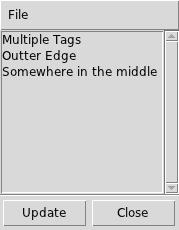

In [8]:
# Open Region -> Groups ...
sleep 3

import -window "Groups" ds9_04_regions_03.png 
display < ds9_04_regions_03.png

In [9]:
xpaset -p ds9 quit

[1]+  Done                    ds9 a401_sm_thresh.flux -block 4 -scale linear -pan to 4205.73 4357.09 physical
